In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

In [2]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


0m 3s (- 1m 20s) (60 4%) 3.5148
0m 6s (- 1m 14s) (120 8%) 3.3539
0m 9s (- 1m 11s) (180 12%) 3.3962
0m 13s (- 1m 12s) (240 16%) 3.1495
0m 18s (- 1m 14s) (300 20%) 2.9152
0m 23s (- 1m 13s) (360 24%) 2.9399
0m 26s (- 1m 9s) (420 28%) 2.8083
0m 30s (- 1m 4s) (480 32%) 2.7108
0m 34s (- 1m 0s) (540 36%) 2.4637
0m 37s (- 0m 56s) (600 40%) 2.2939
0m 41s (- 0m 52s) (660 44%) 2.2569
0m 44s (- 0m 48s) (720 48%) 1.9544
0m 48s (- 0m 44s) (780 52%) 1.6529
0m 52s (- 0m 41s) (840 56%) 1.5495
0m 56s (- 0m 37s) (900 60%) 1.0617
1m 0s (- 0m 34s) (960 64%) 0.8988
1m 4s (- 0m 30s) (1020 68%) 0.5994
1m 9s (- 0m 27s) (1080 72%) 0.6400
1m 13s (- 0m 23s) (1140 76%) 0.4481
1m 17s (- 0m 19s) (1200 80%) 0.2363
1m 20s (- 0m 15s) (1260 84%) 0.1303
1m 25s (- 0m 11s) (1320 88%) 0.0953
1m 28s (- 0m 7s) (1380 92%) 0.0656
1m 32s (- 0m 3s) (1440 96%) 0.0671
1m 35s (- 0m 0s) (1500 100%) 0.0515


<Figure size 432x288 with 0 Axes>

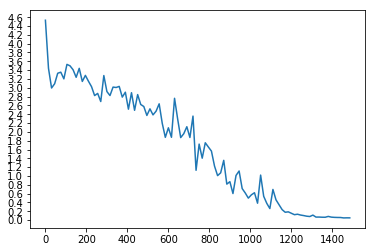

Losses diagram saved in TODO
Models saved in TODO

Predictions written to ../output/toy.preprocessed-test.predicted.en
Blue score written to ../output/toy.preprocessed-test.BLEU
mj 28
mj 28
mj 28


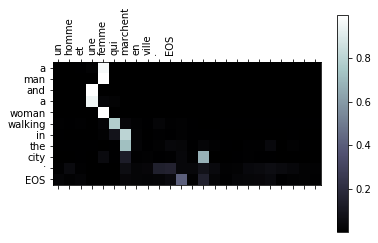

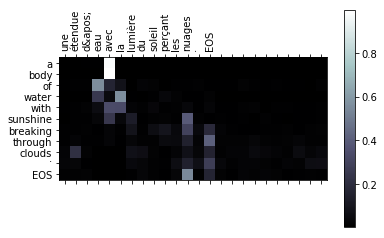

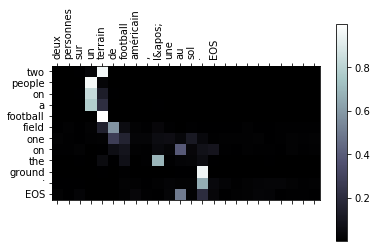

Attention diagrams saved in TODO


In [3]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 1500
max_hours = 9

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = False, useCache = False)


4m 10s (- 100m 6s) (3000 4%) 3.0663
8m 31s (- 97m 58s) (6000 8%) 2.5877
12m 44s (- 93m 23s) (9000 12%) 2.3500
16m 51s (- 88m 32s) (12000 16%) 2.1401
20m 57s (- 83m 48s) (15000 20%) 1.9678
25m 13s (- 79m 54s) (18000 24%) 1.8538
29m 16s (- 75m 17s) (21000 28%) 1.7295
33m 17s (- 70m 45s) (24000 32%) 1.5891
37m 28s (- 66m 37s) (27000 36%) 1.4833
41m 31s (- 62m 16s) (30000 40%) 1.4087
45m 32s (- 57m 57s) (33000 44%) 1.3127
49m 50s (- 53m 59s) (36000 48%) 1.2330
54m 4s (- 49m 55s) (39000 52%) 1.1501
58m 16s (- 45m 47s) (42000 56%) 1.1095
62m 26s (- 41m 37s) (45000 60%) 1.0406
66m 28s (- 37m 23s) (48000 64%) 0.9687
70m 44s (- 33m 17s) (51000 68%) 0.9341
74m 49s (- 29m 5s) (54000 72%) 0.8840
79m 8s (- 24m 59s) (57000 76%) 0.8136
83m 19s (- 20m 49s) (60000 80%) 0.8057
87m 19s (- 16m 37s) (63000 84%) 0.7613
91m 25s (- 12m 28s) (66000 88%) 0.7160
95m 44s (- 8m 19s) (69000 92%) 0.6853
99m 53s (- 4m 9s) (72000 96%) 0.6781
104m 13s (- 0m 0s) (75000 100%) 0.6108


<Figure size 432x288 with 0 Axes>

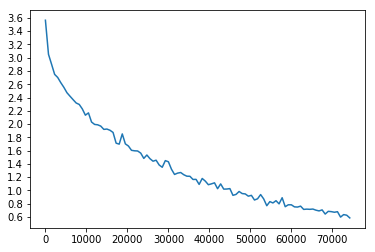

Losses diagram saved in TODO
Models saved in TODO

Predictions written to ../output/tutorial.preprocessed-test.predicted.en
Blue score written to ../output/tutorial.preprocessed-test.BLEU


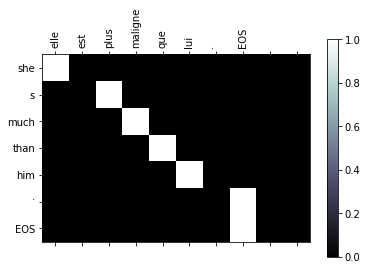

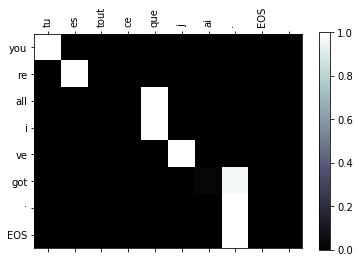

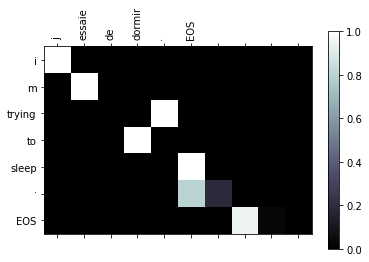

Attention diagrams saved in TODO


In [3]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 75000
max_hours = 9


MAX_LENGTH = 10
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_tutorial, fp.tpath_tutorial, 
    fp.spath_tutorial, fp.tpath_tutorial, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = False, useCache = False)


In [ ]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 100000
max_hours = 10

MAX_LENGTH = 50
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = True, useCache = False)
